In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [4]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import json

In [6]:
twitter_cred = {}

In [7]:
twitter_cred['CONSUMER_KEY'] = 't8QThK6ePA1dp4h8UYze0hYRP' 
twitter_cred['CONSUMER_SECRET'] = 'IePHVgKv0KFTf1grtB2qCKjv7g4tV8SUzsl8EGrRNlzUGZw71A'
twitter_cred['ACCESS_KEY'] = '1048218674316734465-cT3YttYbOYRJAgc2hD1diS0jeBwAaJ'
twitter_cred['ACCESS_SECRET'] = 'PNBNrKfm0rrLPI7zMrTjNHj3sEsAxeNgzOhUuo6nlh86p'

In [8]:
with open('twitter_credentials.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)

In [9]:
import csv
import tweepy
import json

In [10]:
with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

In [12]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    all_the_tweets = []
    new_tweets = api.user_timeline(screen_name=screen_name, count=10000)
    all_the_tweets.extend(new_tweets)
    oldest_tweet = all_the_tweets[-1].id - 1
    
    while len(new_tweets) > 0:
        new_tweets = api.user_timeline(screen_name=screen_name, count=10000, max_id=oldest_tweet)
        all_the_tweets.extend(new_tweets)
        oldest_tweet = all_the_tweets[-1].id - 1
        print ('...%s tweets have been downloaded so far' % len(all_the_tweets))
        
        outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode('utf-8')] for tweet in all_the_tweets]
        with open(screen_name + '_tweets.csv', 'w', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow(['id','created_at','text'])
            writer.writerows(outtweets)
            
if __name__ == '__main__':
    get_all_tweets(input("Enter the twitter handle of the person whose tweets you want to download:- "))

Enter the twitter handle of the person whose tweets you want to download:- LTAtrafficnews
...400 tweets have been downloaded so far
...600 tweets have been downloaded so far
...800 tweets have been downloaded so far
...1000 tweets have been downloaded so far
...1200 tweets have been downloaded so far
...1400 tweets have been downloaded so far
...1600 tweets have been downloaded so far
...1800 tweets have been downloaded so far
...2000 tweets have been downloaded so far
...2200 tweets have been downloaded so far
...2400 tweets have been downloaded so far
...2600 tweets have been downloaded so far
...2800 tweets have been downloaded so far
...3000 tweets have been downloaded so far
...3200 tweets have been downloaded so far
...3222 tweets have been downloaded so far
...3222 tweets have been downloaded so far


In [62]:
df = pd.read_csv('LTAtrafficnews_tweets.csv')

In [63]:
df.head()

id           created_at  \
0  1224176812554481664  2020-02-03 03:44:30   
1  1224174532971204609  2020-02-03 03:35:27   
2  1224171333354868736  2020-02-03 03:22:44   
3  1224156757527650304  2020-02-03 02:24:49   
4  1224155023237468160  2020-02-03 02:17:55   

                                                text  
0  b'Accident on SLE (towards BKE) after Upper Th...  
1  b'Accident on SLE (towards BKE) after Upper Th...  
2  b'Accident on SLE (towards BKE) after Upper Th...  
3  b'Accident on Tampines Avenue 10 towards TPE. ...  
4      b'Accident on Tampines Avenue 10 towards TPE'

In [64]:
df.tail()

id           created_at  \
3217  1200343958783590400  2019-11-29 09:21:15   
3218  1200342977362575360  2019-11-29 09:17:21   
3219  1200340735645478913  2019-11-29 09:08:27   
3220  1200336831616696320  2019-11-29 08:52:56   
3221  1200320986526076930  2019-11-29 07:49:58   

                                                   text  
3217  b'Accident in CTE Tunnel (towards AYE) at Have...  
3218  b'Accident on Scotts Road (towards Claymore Hi...  
3219  b'Accident on KPE (towards TPE) before Nicoll ...  
3220  b'Accident on Orchard Road (towards Bras Basah...  
3221  b'Accident on CTE (towards SLE) after Moulmein...

In [65]:
df.shape

(3222, 3)

In [66]:
df['created_at'].tail()

3217    2019-11-29 09:21:15
3218    2019-11-29 09:17:21
3219    2019-11-29 09:08:27
3220    2019-11-29 08:52:56
3221    2019-11-29 07:49:58
Name: created_at, dtype: object

In [67]:
df['text'][3206]

"b'Accident on AYE (towards MCE) after Alexandra Rd Exit with congestion till Buona Vista Exit. Avoid lane 1'"

In [68]:
df.isnull().sum()

id            0
created_at    0
text          0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 3 columns):
id            3222 non-null int64
created_at    3222 non-null object
text          3222 non-null object
dtypes: int64(1), object(2)
memory usage: 75.6+ KB


## Data Cleaning

In [70]:
df.head(10)

id           created_at  \
0  1224176812554481664  2020-02-03 03:44:30   
1  1224174532971204609  2020-02-03 03:35:27   
2  1224171333354868736  2020-02-03 03:22:44   
3  1224156757527650304  2020-02-03 02:24:49   
4  1224155023237468160  2020-02-03 02:17:55   
5  1224150733127208961  2020-02-03 02:00:53   
6  1224139167124221952  2020-02-03 01:14:55   
7  1224136468727136257  2020-02-03 01:04:12   
8  1224135809650974720  2020-02-03 01:01:35   
9  1224134588043128832  2020-02-03 00:56:43   

                                                text  
0  b'Accident on SLE (towards BKE) after Upper Th...  
1  b'Accident on SLE (towards BKE) after Upper Th...  
2  b'Accident on SLE (towards BKE) after Upper Th...  
3  b'Accident on Tampines Avenue 10 towards TPE. ...  
4      b'Accident on Tampines Avenue 10 towards TPE'  
5  b'Accident on SLE (towards BKE) after Upper Th...  
6  b'Accident on CTE (towards AYE) after AMK Ave ...  
7  b'Accident on PIE (towards Changi Airport) bef...  
8  b'Accident on PIE (towards Changi Airport) bef...  
9  b'Accident on KJE (towards PIE) after Woodland...

In [71]:
df['text'] = df['text'].str.replace("b'", "")
df['text'] = df['text'].str.replace("'", "")

In [72]:
df['text']

0       Accident on SLE (towards BKE) after Upper Thom...
1       Accident on SLE (towards BKE) after Upper Thom...
2       Accident on SLE (towards BKE) after Upper Thom...
3       Accident on Tampines Avenue 10 towards TPE. Av...
4              Accident on Tampines Avenue 10 towards TPE
                              ...                        
3217    Accident in CTE Tunnel (towards AYE) at Havelo...
3218    Accident on Scotts Road (towards Claymore Hill...
3219    Accident on KPE (towards TPE) before Nicoll Hi...
3220    Accident on Orchard Road (towards Bras Basah R...
3221    Accident on CTE (towards SLE) after Moulmein R...
Name: text, Length: 3222, dtype: object

In [73]:
df.text[0]

'Accident on SLE (towards BKE) after Upper Thomson Rd Exit. Avoid lanes 1 and 2'

In [74]:
df.style.set_properties(**{'text-align': 'left'}, inplace=True)

In [75]:
df['text'].str.strip()

0       Accident on SLE (towards BKE) after Upper Thom...
1       Accident on SLE (towards BKE) after Upper Thom...
2       Accident on SLE (towards BKE) after Upper Thom...
3       Accident on Tampines Avenue 10 towards TPE. Av...
4              Accident on Tampines Avenue 10 towards TPE
                              ...                        
3217    Accident in CTE Tunnel (towards AYE) at Havelo...
3218    Accident on Scotts Road (towards Claymore Hill...
3219    Accident on KPE (towards TPE) before Nicoll Hi...
3220    Accident on Orchard Road (towards Bras Basah R...
3221    Accident on CTE (towards SLE) after Moulmein R...
Name: text, Length: 3222, dtype: object

In [76]:
df.head()

id           created_at  \
0  1224176812554481664  2020-02-03 03:44:30   
1  1224174532971204609  2020-02-03 03:35:27   
2  1224171333354868736  2020-02-03 03:22:44   
3  1224156757527650304  2020-02-03 02:24:49   
4  1224155023237468160  2020-02-03 02:17:55   

                                                text  
0  Accident on SLE (towards BKE) after Upper Thom...  
1  Accident on SLE (towards BKE) after Upper Thom...  
2  Accident on SLE (towards BKE) after Upper Thom...  
3  Accident on Tampines Avenue 10 towards TPE. Av...  
4         Accident on Tampines Avenue 10 towards TPE

In [77]:
df.style.set_properties(**{'text-align': 'left'}, inplace=True)

In [78]:
df.head()

id           created_at  \
0  1224176812554481664  2020-02-03 03:44:30   
1  1224174532971204609  2020-02-03 03:35:27   
2  1224171333354868736  2020-02-03 03:22:44   
3  1224156757527650304  2020-02-03 02:24:49   
4  1224155023237468160  2020-02-03 02:17:55   

                                                text  
0  Accident on SLE (towards BKE) after Upper Thom...  
1  Accident on SLE (towards BKE) after Upper Thom...  
2  Accident on SLE (towards BKE) after Upper Thom...  
3  Accident on Tampines Avenue 10 towards TPE. Av...  
4         Accident on Tampines Avenue 10 towards TPE

In [79]:
df['DateTime'] = pd.to_datetime(df['created_at'])
df['Date'] = df['DateTime'].dt.strftime('%d/%m/%Y')
df['Time'] = df['DateTime'].dt.strftime('%H:%M')
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

In [80]:
df.head()

id           created_at  \
0  1224176812554481664  2020-02-03 03:44:30   
1  1224174532971204609  2020-02-03 03:35:27   
2  1224171333354868736  2020-02-03 03:22:44   
3  1224156757527650304  2020-02-03 02:24:49   
4  1224155023237468160  2020-02-03 02:17:55   

                                                text            DateTime  \
0  Accident on SLE (towards BKE) after Upper Thom... 2020-02-03 03:44:30   
1  Accident on SLE (towards BKE) after Upper Thom... 2020-02-03 03:35:27   
2  Accident on SLE (towards BKE) after Upper Thom... 2020-02-03 03:22:44   
3  Accident on Tampines Avenue 10 towards TPE. Av... 2020-02-03 02:24:49   
4         Accident on Tampines Avenue 10 towards TPE 2020-02-03 02:17:55   

         Date   Time  Hour  
0  03/02/2020  03:44     3  
1  03/02/2020  03:35     3  
2  03/02/2020  03:22     3  
3  03/02/2020  02:24     2  
4  03/02/2020  02:17     2

In [81]:
df.Hour.unique()

array([ 3,  2,  1,  0, 23, 21, 15,  9,  8,  7,  6,  5,  4, 13, 12, 11, 10,
       19, 17, 16, 14, 22, 20, 18])

In [82]:
df.drop(columns=['id', 'created_at', 'DateTime'], inplace=True)

In [83]:
df.head()

text        Date   Time  Hour
0  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  03:44     3
1  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  03:35     3
2  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  03:22     3
3  Accident on Tampines Avenue 10 towards TPE. Av...  03/02/2020  02:24     2
4         Accident on Tampines Avenue 10 towards TPE  03/02/2020  02:17     2

In [84]:
df['Year']=[d.split('/')[2] for d in df.Date]
df['Month']=[d.split('/')[1] for d in df.Date]
df['Day']=[d.split('/')[0] for d in df.Date]

In [85]:
df.head()

text        Date   Time  Hour  \
0  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  03:44     3   
1  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  03:35     3   
2  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  03:22     3   
3  Accident on Tampines Avenue 10 towards TPE. Av...  03/02/2020  02:24     2   
4         Accident on Tampines Avenue 10 towards TPE  03/02/2020  02:17     2   

   Year Month Day  
0  2020    02  03  
1  2020    02  03  
2  2020    02  03  
3  2020    02  03  
4  2020    02  03

In [86]:
df['Day_of_Week'] = pd.to_datetime(df['Date']).dt.weekday_name

In [87]:
df.head(10)

text        Date   Time  Hour  \
0  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  03:44     3   
1  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  03:35     3   
2  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  03:22     3   
3  Accident on Tampines Avenue 10 towards TPE. Av...  03/02/2020  02:24     2   
4         Accident on Tampines Avenue 10 towards TPE  03/02/2020  02:17     2   
5  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  02:00     2   
6  Accident on CTE (towards AYE) after AMK Ave 5 ...  03/02/2020  01:14     1   
7  Accident on PIE (towards Changi Airport) befor...  03/02/2020  01:04     1   
8  Accident on PIE (towards Changi Airport) befor...  03/02/2020  01:01     1   
9  Accident on KJE (towards PIE) after Woodlands ...  03/02/2020  00:56     0   

   Year Month Day Day_of_Week  
0  2020    02  03      Monday  
1  2020    02  03      Monday  
2  2020    02  03      Monday  
3  2020    02  03      Monday  
4  2020    02  03      Monday  
5  2020    02  03      Monday  
6  2020    02  03      Monday  
7  2020    02  03      Monday  
8  2020    02  03      Monday  
9  2020    02  03      Monday

In [88]:
df.Day_of_Week.unique()

array(['Monday', 'Sunday', 'Thursday', 'Friday', 'Wednesday', 'Tuesday',
       'Saturday'], dtype=object)

In [89]:
df.Month.unique()

array(['02', '01', '12', '11'], dtype=object)

In [90]:
month_mapping = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May',
            '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}

In [91]:
df['Month'] = df['Month'].apply(lambda x: month_mapping[x])

In [92]:
df.head()

text        Date   Time  Hour  \
0  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  03:44     3   
1  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  03:35     3   
2  Accident on SLE (towards BKE) after Upper Thom...  03/02/2020  03:22     3   
3  Accident on Tampines Avenue 10 towards TPE. Av...  03/02/2020  02:24     2   
4         Accident on Tampines Avenue 10 towards TPE  03/02/2020  02:17     2   

   Year     Month Day Day_of_Week  
0  2020  February  03      Monday  
1  2020  February  03      Monday  
2  2020  February  03      Monday  
3  2020  February  03      Monday  
4  2020  February  03      Monday

In [93]:
df = df[['Year', 'Month', 'Day', 'Day_of_Week', 'Time', 'Hour', 'text']]

In [94]:
df.head(10)

Year     Month Day Day_of_Week   Time  Hour  \
0  2020  February  03      Monday  03:44     3   
1  2020  February  03      Monday  03:35     3   
2  2020  February  03      Monday  03:22     3   
3  2020  February  03      Monday  02:24     2   
4  2020  February  03      Monday  02:17     2   
5  2020  February  03      Monday  02:00     2   
6  2020  February  03      Monday  01:14     1   
7  2020  February  03      Monday  01:04     1   
8  2020  February  03      Monday  01:01     1   
9  2020  February  03      Monday  00:56     0   

                                                text  
0  Accident on SLE (towards BKE) after Upper Thom...  
1  Accident on SLE (towards BKE) after Upper Thom...  
2  Accident on SLE (towards BKE) after Upper Thom...  
3  Accident on Tampines Avenue 10 towards TPE. Av...  
4         Accident on Tampines Avenue 10 towards TPE  
5  Accident on SLE (towards BKE) after Upper Thom...  
6  Accident on CTE (towards AYE) after AMK Ave 5 ...  
7  Accident on PIE (towards Changi Airport) befor...  
8  Accident on PIE (towards Changi Airport) befor...  
9  Accident on KJE (towards PIE) after Woodlands ...

In [95]:
df.rename(columns={"Year": "year", "Month": "month_name", "Day": "day_num", "Day_of_Week": "day_name", "Time": "time", "Hour": "hour"}, inplace=True)

In [96]:
df.head()

year month_name day_num day_name   time  hour  \
0  2020   February      03   Monday  03:44     3   
1  2020   February      03   Monday  03:35     3   
2  2020   February      03   Monday  03:22     3   
3  2020   February      03   Monday  02:24     2   
4  2020   February      03   Monday  02:17     2   

                                                text  
0  Accident on SLE (towards BKE) after Upper Thom...  
1  Accident on SLE (towards BKE) after Upper Thom...  
2  Accident on SLE (towards BKE) after Upper Thom...  
3  Accident on Tampines Avenue 10 towards TPE. Av...  
4         Accident on Tampines Avenue 10 towards TPE

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 7 columns):
year          3222 non-null object
month_name    3222 non-null object
day_num       3222 non-null object
day_name      3222 non-null object
time          3222 non-null object
hour          3222 non-null int64
text          3222 non-null object
dtypes: int64(1), object(6)
memory usage: 176.3+ KB


In [98]:
df.describe

<bound method NDFrame.describe of       year month_name day_num day_name   time  hour  \
0     2020   February      03   Monday  03:44     3   
1     2020   February      03   Monday  03:35     3   
2     2020   February      03   Monday  03:22     3   
3     2020   February      03   Monday  02:24     2   
4     2020   February      03   Monday  02:17     2   
...    ...        ...     ...      ...    ...   ...   
3217  2019   November      29   Friday  09:21     9   
3218  2019   November      29   Friday  09:17     9   
3219  2019   November      29   Friday  09:08     9   
3220  2019   November      29   Friday  08:52     8   
3221  2019   November      29   Friday  07:49     7   

                                                   text  
0     Accident on SLE (towards BKE) after Upper Thom...  
1     Accident on SLE (towards BKE) after Upper Thom...  
2     Accident on SLE (towards BKE) after Upper Thom...  
3     Accident on Tampines Avenue 10 towards TPE. Av...  
4            Ac

In [99]:
def RTAs_by_month(df, month):
    month_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["month_name"] == month and row["day_name"] == "Monday": mon +=1
        elif row["month_name"] == month and row["day_name"] == "Tuesday": tues +=1
        elif row["month_name"] == month and row["day_name"] == "Wednesday": wed +=1
        elif row["month_name"] == month and row["day_name"] == "Thursday": thurs +=1
        elif row["month_name"] == month and row["day_name"] == "Friday": fri +=1
        elif row["month_name"] == month and row["day_name"] == "Saturday": sat +=1
        elif row["month_name"] == month and row["day_name"] == "Sunday": sun +=1
        else: a=0 

    month_list.append(mon)
    month_list.append(tues)
    month_list.append(wed)
    month_list.append(thurs)
    month_list.append(fri)
    month_list.append(sat)
    month_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(month_list)

In [100]:
#Extract RTA data for each day by month
january = RTAs_by_month(df, "January")
february = RTAs_by_month(df, "February")
march = RTAs_by_month(df, "March")
april = RTAs_by_month(df, "April")
may = RTAs_by_month(df, "May")
june = RTAs_by_month(df, "June")
july = RTAs_by_month(df, "July")
august = RTAs_by_month(df, "August")
september = RTAs_by_month(df, "September")
october = RTAs_by_month(df, "October")
november = RTAs_by_month(df, "November")
december = RTAs_by_month(df, "December")

In [101]:
#Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data = np.array([january, february, march, april, may, june, july, august, september, october, november, december])
heatmap_df = pd.DataFrame(data=data, index=rows, columns=columns)

In [102]:
heatmap_df

Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
January       221      209        289       168     199       160     145
February       21        0          0        27       0         0      26
March           0        0          0         0       0         0       0
April           0        0          0         0       0         0       0
May             0        0          0         0       0         0       0
June            0        0          0         0       0         0       0
July            0        0          0         0       0         0       0
August          0        0          0         0       0         0       0
September       0        0          0         0       0         0       0
October         0        0          0         0       0         0       0
November        0        0          0         0      41       101       0
December      172      414        147       209     247       292     134

In [103]:
heatmap_df.drop(["March", "April", "May", "June", "July", "August", "September", "October"], inplace=True)
heatmap_df

Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
January      221      209        289       168     199       160     145
February      21        0          0        27       0         0      26
November       0        0          0         0      41       101       0
December     172      414        147       209     247       292     134

(4.0, 0.0)

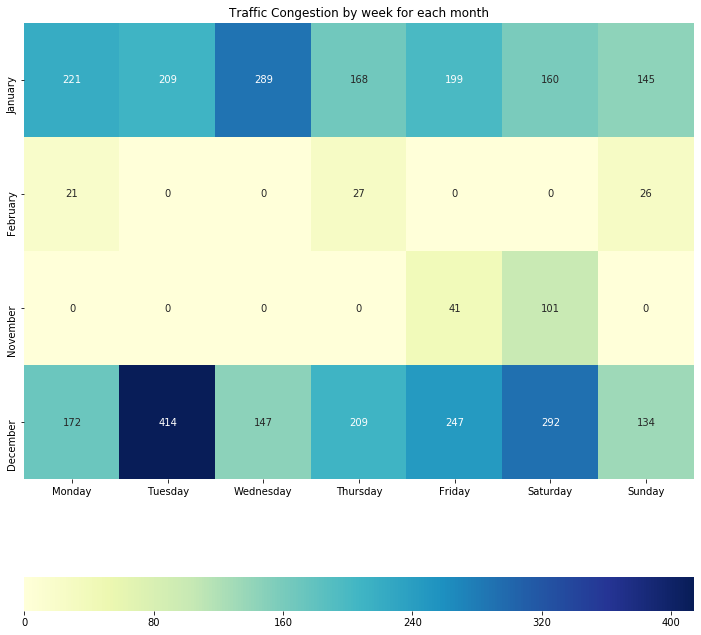

In [104]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(heatmap_df, annot=True, fmt="d", cmap='YlGnBu', cbar_kws={"orientation": "horizontal"} )
ax.set_title("Traffic Congestion by week for each month")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [105]:
def RTAs_by_hour(df, hour):
    hour_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["hour"] == hour and row["day_name"] == "Monday": mon +=1
        elif row["hour"] == hour and row["day_name"] == "Tuesday": tues +=1
        elif row["hour"] == hour and row["day_name"] == "Wednesday": wed +=1
        elif row["hour"] == hour and row["day_name"] == "Thursday": thurs +=1
        elif row["hour"] == hour and row["day_name"] == "Friday": fri +=1
        elif row["hour"] == hour and row["day_name"] == "Saturday": sat +=1
        elif row["hour"] == hour and row["day_name"] == "Sunday": sun +=1
        else: a=0 

    hour_list.append(mon)
    hour_list.append(tues)
    hour_list.append(wed)
    hour_list.append(thurs)
    hour_list.append(fri)
    hour_list.append(sat)
    hour_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(hour_list)

In [106]:
hour_0 = RTAs_by_hour(df, 0)
hour_1 = RTAs_by_hour(df, 1)
hour_2 = RTAs_by_hour(df, 2)
hour_3 = RTAs_by_hour(df, 3)
hour_4 = RTAs_by_hour(df, 4)
hour_5 = RTAs_by_hour(df, 5)
hour_6 = RTAs_by_hour(df, 6)
hour_7 = RTAs_by_hour(df, 7)
hour_8 = RTAs_by_hour(df, 8)
hour_9 = RTAs_by_hour(df, 9)
hour_10 = RTAs_by_hour(df, 10)
hour_11 = RTAs_by_hour(df, 11)
hour_12 = RTAs_by_hour(df, 12)
hour_13 = RTAs_by_hour(df, 13)
hour_14 = RTAs_by_hour(df, 14)
hour_15 = RTAs_by_hour(df, 15)
hour_16 = RTAs_by_hour(df, 16)
hour_17 = RTAs_by_hour(df, 17)
hour_18 = RTAs_by_hour(df, 18)
hour_19 = RTAs_by_hour(df, 19)
hour_20 = RTAs_by_hour(df, 20)
hour_21 = RTAs_by_hour(df, 21)
hour_22 = RTAs_by_hour(df, 22)
hour_23 = RTAs_by_hour(df, 23)
hour_24 = RTAs_by_hour(df, 24)

In [107]:
#Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["0", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm", "1pm", "2pm", "3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
data = np.array([hour_0, hour_1, hour_2, hour_3, hour_4, hour_5, hour_6, hour_7, hour_8, hour_9, hour_10, hour_11, hour_12, hour_13, hour_14, hour_15, hour_16, hour_17, hour_18, hour_19, hour_20, hour_21, hour_22, hour_23])
heatmap_hour = pd.DataFrame(data=data, index=rows, columns=columns)

(24.0, 0.0)

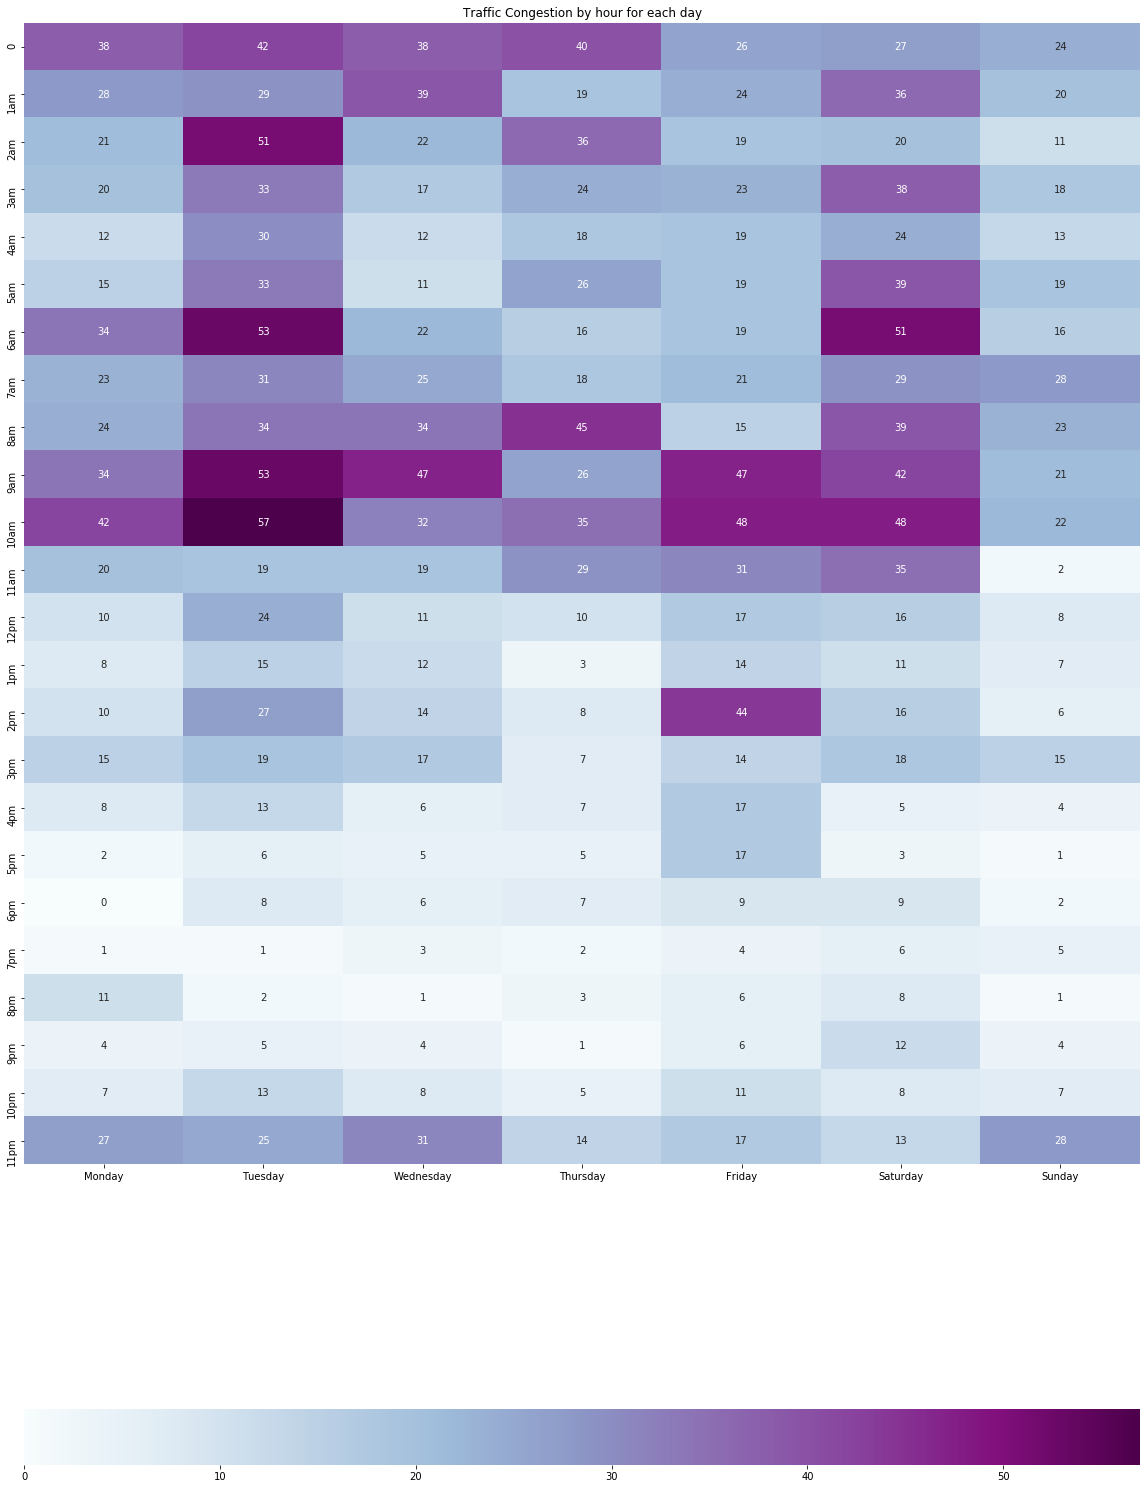

In [108]:
fig = plt.figure(figsize=(20,30))
ax = sns.heatmap(heatmap_hour, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
ax.set_title("Traffic Congestion by hour for each day")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [109]:
df.head(15)

year month_name day_num day_name   time  hour  \
0   2020   February      03   Monday  03:44     3   
1   2020   February      03   Monday  03:35     3   
2   2020   February      03   Monday  03:22     3   
3   2020   February      03   Monday  02:24     2   
4   2020   February      03   Monday  02:17     2   
5   2020   February      03   Monday  02:00     2   
6   2020   February      03   Monday  01:14     1   
7   2020   February      03   Monday  01:04     1   
8   2020   February      03   Monday  01:01     1   
9   2020   February      03   Monday  00:56     0   
10  2020   February      03   Monday  00:56     0   
11  2020   February      03   Monday  00:53     0   
12  2020   February      03   Monday  00:48     0   
13  2020   February      03   Monday  00:42     0   
14  2020   February      03   Monday  00:41     0   

                                                 text  
0   Accident on SLE (towards BKE) after Upper Thom...  
1   Accident on SLE (towards BKE) after Upper Thom...  
2   Accident on SLE (towards BKE) after Upper Thom...  
3   Accident on Tampines Avenue 10 towards TPE. Av...  
4          Accident on Tampines Avenue 10 towards TPE  
5   Accident on SLE (towards BKE) after Upper Thom...  
6   Accident on CTE (towards AYE) after AMK Ave 5 ...  
7   Accident on PIE (towards Changi Airport) befor...  
8   Accident on PIE (towards Changi Airport) befor...  
9   Accident on KJE (towards PIE) after Woodlands ...  
10  Accident on CTE (towards AYE) after AMK Ave 5 ...  
11  Accident on PIE (towards Changi Airport) after...  
12  Accident on KJE (towards PIE) after Woodlands ...  
13  Accident on SLE (towards BKE) after Upper Thom...  
14  Accident on PIE (towards Changi Airport) after...

In [112]:
df.text[3200]

'Heavy Traffic on TPE (towards PIE) after Punggol Rd Exit'

In [117]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    if polarity_scores['neg'] > polarity_scores['pos']:
        return 'serious'
    else:
        return 'non-serious'
    
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [118]:
sentiments_using_SIA = df.text.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

text
serious      2873
non-serious   349

In [120]:
sentiments_using_textblob = df.text.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

text
pos  3006
neg   216

In [121]:
# I will use SentimentIntensityAnalyzer instead because it returns more negative values
df['sentiment'] = sentiments_using_SIA
df.head(50)

year month_name day_num  day_name   time  hour  \
0   2020   February      03    Monday  03:44     3   
1   2020   February      03    Monday  03:35     3   
2   2020   February      03    Monday  03:22     3   
3   2020   February      03    Monday  02:24     2   
4   2020   February      03    Monday  02:17     2   
5   2020   February      03    Monday  02:00     2   
6   2020   February      03    Monday  01:14     1   
7   2020   February      03    Monday  01:04     1   
8   2020   February      03    Monday  01:01     1   
9   2020   February      03    Monday  00:56     0   
10  2020   February      03    Monday  00:56     0   
11  2020   February      03    Monday  00:53     0   
12  2020   February      03    Monday  00:48     0   
13  2020   February      03    Monday  00:42     0   
14  2020   February      03    Monday  00:41     0   
15  2020   February      03    Monday  00:40     0   
16  2020   February      03    Monday  00:28     0   
17  2020   February      03    Monday  00:17     0   
18  2020   February      03    Monday  00:15     0   
19  2020   February      03    Monday  00:11     0   
20  2020   February      03    Monday  00:04     0   
21  2020   February      02    Sunday  23:48    23   
22  2020   February      02    Sunday  23:38    23   
23  2020   February      02    Sunday  23:24    23   
24  2020   February      02    Sunday  23:06    23   
25  2020   February      02    Sunday  21:36    21   
26  2020   February      02    Sunday  15:44    15   
27  2020   February      02    Sunday  15:36    15   
28  2020   February      02    Sunday  09:25     9   
29  2020   February      02    Sunday  08:47     8   
30  2020   February      02    Sunday  07:10     7   
31  2020   February      02    Sunday  07:08     7   
32  2020   February      02    Sunday  06:23     6   
33  2020   February      02    Sunday  06:21     6   
34  2020   February      02    Sunday  06:19     6   
35  2020   February      02    Sunday  06:05     6   
36  2020   February      02    Sunday  06:04     6   
37  2020   February      02    Sunday  05:17     5   
38  2020   February      02    Sunday  04:28     4   
39  2020   February      02    Sunday  03:32     3   
40  2020   February      02    Sunday  03:29     3   
41  2020   February      02    Sunday  03:14     3   
42  2020   February      02    Sunday  02:53     2   
43  2020   February      02    Sunday  02:51     2   
44  2020   February      02    Sunday  02:05     2   
45  2020   February      02    Sunday  01:34     1   
46  2020   February      02    Sunday  01:15     1   
47  2020   February      01  Thursday  13:16    13   
48  2020   February      01  Thursday  12:58    12   
49  2020   February      01  Thursday  11:58    11   

                                                 text    sentiment  
0   Accident on SLE (towards BKE) after Upper Thom...      serious  
1   Accident on SLE (towards BKE) after Upper Thom...      serious  
2   Accident on SLE (towards BKE) after Upper Thom...      serious  
3   Accident on Tampines Avenue 10 towards TPE. Av...      serious  
4          Accident on Tampines Avenue 10 towards TPE      serious  
5   Accident on SLE (towards BKE) after Upper Thom...      serious  
6   Accident on CTE (towards AYE) after AMK Ave 5 ...      serious  
7   Accident on PIE (towards Changi Airport) befor...      serious  
8   Accident on PIE (towards Changi Airport) befor...      serious  
9   Accident on KJE (towards PIE) after Woodlands ...      serious  
10  Accident on CTE (towards AYE) after AMK Ave 5 ...      serious  
11  Accident on PIE (towards Changi Airport) after...      serious  
12  Accident on KJE (towards PIE) after Woodlands ...      serious  
13  Accident on SLE (towards BKE) after Upper Thom...      serious  
14  Accident on PIE (towards Changi Airport) after...      serious  
15  Accident on SLE (towards BKE) after Upper Thom...      serious  
16  Heavy Traffic on AYE (towards MCE) after Cleme...  non-serious  
17  Acc

In [122]:
df['sentiment'].unique()

array(['serious', 'non-serious'], dtype=object)

In [123]:
df_non_serious = df.loc[df['sentiment'].isin(['non_serious'])]

In [124]:
df_serious = df.loc[df['sentiment'].isin(['serious'])]

In [125]:
#Removing links (http | https)

cleaned_tweets = []

for index, row in df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.text.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

df['text'] = cleaned_tweets
df.head(10)

year month_name day_num day_name   time  hour  \
0  2020   February      03   Monday  03:44     3   
1  2020   February      03   Monday  03:35     3   
2  2020   February      03   Monday  03:22     3   
3  2020   February      03   Monday  02:24     2   
4  2020   February      03   Monday  02:17     2   
5  2020   February      03   Monday  02:00     2   
6  2020   February      03   Monday  01:14     1   
7  2020   February      03   Monday  01:04     1   
8  2020   February      03   Monday  01:01     1   
9  2020   February      03   Monday  00:56     0   

                                                text sentiment  
0  Accident on SLE (towards BKE) after Upper Thom...   serious  
1  Accident on SLE (towards BKE) after Upper Thom...   serious  
2  Accident on SLE (towards BKE) after Upper Thom...   serious  
3  Accident on Tampines Avenue 10 towards TPE. Av...   serious  
4         Accident on Tampines Avenue 10 towards TPE   serious  
5  Accident on SLE (towards BKE) after Upper Thom...   serious  
6  Accident on CTE (towards AYE) after AMK Ave 5 ...   serious  
7  Accident on PIE (towards Changi Airport) befor...   serious  
8  Accident on PIE (towards Changi Airport) befor...   serious  
9  Accident on KJE (towards PIE) after Woodlands ...   serious

In [126]:
#Removing tweets with empty text

df = df[df['text']!='']
df.head()

year month_name day_num day_name   time  hour  \
0  2020   February      03   Monday  03:44     3   
1  2020   February      03   Monday  03:35     3   
2  2020   February      03   Monday  03:22     3   
3  2020   February      03   Monday  02:24     2   
4  2020   February      03   Monday  02:17     2   

                                                text sentiment  
0  Accident on SLE (towards BKE) after Upper Thom...   serious  
1  Accident on SLE (towards BKE) after Upper Thom...   serious  
2  Accident on SLE (towards BKE) after Upper Thom...   serious  
3  Accident on Tampines Avenue 10 towards TPE. Av...   serious  
4         Accident on Tampines Avenue 10 towards TPE   serious

In [127]:
#Dropping duplicate rows

df.drop_duplicates(subset=['text'], keep=False)
df.head()

year month_name day_num day_name   time  hour  \
0  2020   February      03   Monday  03:44     3   
1  2020   February      03   Monday  03:35     3   
2  2020   February      03   Monday  03:22     3   
3  2020   February      03   Monday  02:24     2   
4  2020   February      03   Monday  02:17     2   

                                                text sentiment  
0  Accident on SLE (towards BKE) after Upper Thom...   serious  
1  Accident on SLE (towards BKE) after Upper Thom...   serious  
2  Accident on SLE (towards BKE) after Upper Thom...   serious  
3  Accident on Tampines Avenue 10 towards TPE. Av...   serious  
4         Accident on Tampines Avenue 10 towards TPE   serious

In [128]:
#Resetting index

df = df.reset_index(drop=True)
df.head()

year month_name day_num day_name   time  hour  \
0  2020   February      03   Monday  03:44     3   
1  2020   February      03   Monday  03:35     3   
2  2020   February      03   Monday  03:22     3   
3  2020   February      03   Monday  02:24     2   
4  2020   February      03   Monday  02:17     2   

                                                text sentiment  
0  Accident on SLE (towards BKE) after Upper Thom...   serious  
1  Accident on SLE (towards BKE) after Upper Thom...   serious  
2  Accident on SLE (towards BKE) after Upper Thom...   serious  
3  Accident on Tampines Avenue 10 towards TPE. Av...   serious  
4         Accident on Tampines Avenue 10 towards TPE   serious

In [129]:
#Removing Punctuations, Numbers and Special characters

df['cleaned_text'] = df['text'].str.replace("[^a-zA-Z# ]", "")
df.head()

year month_name day_num day_name   time  hour  \
0  2020   February      03   Monday  03:44     3   
1  2020   February      03   Monday  03:35     3   
2  2020   February      03   Monday  03:22     3   
3  2020   February      03   Monday  02:24     2   
4  2020   February      03   Monday  02:17     2   

                                                text sentiment  \
0  Accident on SLE (towards BKE) after Upper Thom...   serious   
1  Accident on SLE (towards BKE) after Upper Thom...   serious   
2  Accident on SLE (towards BKE) after Upper Thom...   serious   
3  Accident on Tampines Avenue 10 towards TPE. Av...   serious   
4         Accident on Tampines Avenue 10 towards TPE   serious   

                                        cleaned_text  
0  Accident on SLE towards BKE after Upper Thomso...  
1  Accident on SLE towards BKE after Upper Thomso...  
2  Accident on SLE towards BKE after Upper Thomso...  
3  Accident on Tampines Avenue  towards TPE Avoid...  
4           Accident on Tampines Avenue  towards TPE

In [130]:
#Removing Stop words

from nltk.corpus import stopwords
# downloading stopwords corpus
nltk.download('stopwords')
stopwords = set(stopwords.words("english"))

stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.cleaned_text.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
df['cleaned_text'] = cleaned_tweets
df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/radhevenkatesan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


year month_name day_num day_name   time  hour  \
0  2020   February      03   Monday  03:44     3   
1  2020   February      03   Monday  03:35     3   
2  2020   February      03   Monday  03:22     3   
3  2020   February      03   Monday  02:24     2   
4  2020   February      03   Monday  02:17     2   
5  2020   February      03   Monday  02:00     2   
6  2020   February      03   Monday  01:14     1   
7  2020   February      03   Monday  01:04     1   
8  2020   February      03   Monday  01:01     1   
9  2020   February      03   Monday  00:56     0   

                                                text sentiment  \
0  Accident on SLE (towards BKE) after Upper Thom...   serious   
1  Accident on SLE (towards BKE) after Upper Thom...   serious   
2  Accident on SLE (towards BKE) after Upper Thom...   serious   
3  Accident on Tampines Avenue 10 towards TPE. Av...   serious   
4         Accident on Tampines Avenue 10 towards TPE   serious   
5  Accident on SLE (towards BKE) after Upper Thom...   serious   
6  Accident on CTE (towards AYE) after AMK Ave 5 ...   serious   
7  Accident on PIE (towards Changi Airport) befor...   serious   
8  Accident on PIE (towards Changi Airport) befor...   serious   
9  Accident on KJE (towards PIE) after Woodlands ...   serious   

                                        cleaned_text  
0  Accident SLE towards BKE Upper Thomson Rd Exit...  
1  Accident SLE towards BKE Upper Thomson Rd Exit...  
2  Accident SLE towards BKE Upper Thomson Rd Exit...  
3  Accident Tampines Avenue towards TPE Avoid rig...  
4               Accident Tampines Avenue towards TPE  
5  Accident SLE towards BKE Upper Thomson Rd Exit...  
6  Accident CTE towards AYE AMK Ave Exit congesti...  
7    Accident PIE towards Changi Airport Eng Neo Ave  
8  Accident PIE towards Changi Airport Eng Neo Av...  
9  Accident KJE towards PIE Woodlands Rd Exit con...

In [131]:
tokenized_text = df['cleaned_text'].apply(lambda x: x.split())
tokenized_text.head()

0    [Accident, SLE, towards, BKE, Upper, Thomson, ...
1    [Accident, SLE, towards, BKE, Upper, Thomson, ...
2    [Accident, SLE, towards, BKE, Upper, Thomson, ...
3    [Accident, Tampines, Avenue, towards, TPE, Avo...
4           [Accident, Tampines, Avenue, towards, TPE]
Name: cleaned_text, dtype: object

In [132]:
import nltk
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()

tokenized_text = tokenized_text.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_text.head()

0    [Accident, SLE, towards, BKE, Upper, Thomson, ...
1    [Accident, SLE, towards, BKE, Upper, Thomson, ...
2    [Accident, SLE, towards, BKE, Upper, Thomson, ...
3    [Accident, Tampines, Avenue, towards, TPE, Avo...
4           [Accident, Tampines, Avenue, towards, TPE]
Name: cleaned_text, dtype: object

In [133]:
for i, tokens in enumerate(tokenized_text):
    tokenized_text[i] = ' '.join(tokens)

df['cleaned_text'] = tokenized_text
df.head(10)

year month_name day_num day_name   time  hour  \
0  2020   February      03   Monday  03:44     3   
1  2020   February      03   Monday  03:35     3   
2  2020   February      03   Monday  03:22     3   
3  2020   February      03   Monday  02:24     2   
4  2020   February      03   Monday  02:17     2   
5  2020   February      03   Monday  02:00     2   
6  2020   February      03   Monday  01:14     1   
7  2020   February      03   Monday  01:04     1   
8  2020   February      03   Monday  01:01     1   
9  2020   February      03   Monday  00:56     0   

                                                text sentiment  \
0  Accident on SLE (towards BKE) after Upper Thom...   serious   
1  Accident on SLE (towards BKE) after Upper Thom...   serious   
2  Accident on SLE (towards BKE) after Upper Thom...   serious   
3  Accident on Tampines Avenue 10 towards TPE. Av...   serious   
4         Accident on Tampines Avenue 10 towards TPE   serious   
5  Accident on SLE (towards BKE) after Upper Thom...   serious   
6  Accident on CTE (towards AYE) after AMK Ave 5 ...   serious   
7  Accident on PIE (towards Changi Airport) befor...   serious   
8  Accident on PIE (towards Changi Airport) befor...   serious   
9  Accident on KJE (towards PIE) after Woodlands ...   serious   

                                        cleaned_text  
0  Accident SLE towards BKE Upper Thomson Rd Exit...  
1  Accident SLE towards BKE Upper Thomson Rd Exit...  
2  Accident SLE towards BKE Upper Thomson Rd Exit...  
3  Accident Tampines Avenue towards TPE Avoid rig...  
4               Accident Tampines Avenue towards TPE  
5  Accident SLE towards BKE Upper Thomson Rd Exit...  
6  Accident CTE towards AYE AMK Ave Exit congesti...  
7    Accident PIE towards Changi Airport Eng Neo Ave  
8  Accident PIE towards Changi Airport Eng Neo Av...  
9  Accident KJE towards PIE Woodlands Rd Exit con...

## Pre-processing 'Key Phrases'

In [134]:
#Helper class, will help in preprocessing phrase terms

In [135]:
class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        """Finds NP (nounphrase) leaf nodes of a chunk tree."""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        """Normalises words to lowercase and stems and lemmatizes it."""
        word = word.lower()
        # word = self.stemmer.stem_word(word) # We will loose the exact meaning of the word 
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        """Checks conditions for acceptable word: length, stopword. We can increase the length if we want to consider large phrase"""
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term

In [136]:
# Grammatical rule to identify phrases

sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

In [137]:
# New feature called 'key_phrases', will contain phrases for corresponding tweet

key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in df.iterrows(): 
    toks = nltk.regexp_tokenize(row.text, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    text_phrases = []

    for term in terms:
        if len(term):
            text_phrases.append(' '.join(term))
    
    key_phrases.append(text_phrases)
    
key_phrases[:10]

[['accident', ' sle', ' bke', 'upper thomson exit', 'avoid'],
 ['accident',
  ' sle',
  ' bke',
  'upper thomson exit',
  'congestion till upper thomson exit'],
 ['accident',
  ' sle',
  ' bke',
  'upper thomson exit',
  'congestion till upper thomson exit . sl',
  'upper thomson exit'],
 ['accident', 'tampines avenue', 'towards  tpe', 'avoid right lane'],
 ['accident', 'tampines avenue', 'towards  tpe'],
 ['accident',
  ' sle',
  ' bke',
  'upper thomson exit',
  'congestion till upper thomson exit',
  'avoid lane'],
 ['accident',
  ' cte',
  ' aye',
  ' amk ave  5 e xit',
  'congestion till yio chu kang exit',
  'avoid lane'],
 ['accident', ' pie', 'towards changi airport', 'eng neo ave'],
 ['accident', ' pie', 'towards changi airport', 'eng neo ave', 'avoid lane'],
 ['accident',
  ' kje',
  ' pie',
  'woodland exit',
  'congestion till  bke entrance',
  'avoid lane']]

In [138]:
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in df.iterrows():
    # filerting out all the hashtags
    words_without_hash = [word for word in row.text.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

textblob_key_phrases[:10]

[['accident', 'upper thomson rd exit'],
 ['accident', 'upper thomson rd exit', 'upper thomson rd exit'],
 ['accident',
  'upper thomson rd exit',
  'upper thomson rd exit',
  'upper thomson rd exit'],
 ['accident', 'tampines avenue 10', 'right lane'],
 ['accident', 'tampines avenue 10'],
 ['accident', 'upper thomson rd exit', 'upper thomson rd exit'],
 ['accident', 'amk ave 5 exit', 'yio chu kang rd exit'],
 ['accident', 'changi airport', 'eng neo ave'],
 ['accident', 'changi airport', 'eng neo ave'],
 ['accident', 'woodlands rd exit', 'bke entrance']]

In [139]:
df['key_phrases'] = textblob_key_phrases
df.head(15)

year month_name day_num day_name   time  hour  \
0   2020   February      03   Monday  03:44     3   
1   2020   February      03   Monday  03:35     3   
2   2020   February      03   Monday  03:22     3   
3   2020   February      03   Monday  02:24     2   
4   2020   February      03   Monday  02:17     2   
5   2020   February      03   Monday  02:00     2   
6   2020   February      03   Monday  01:14     1   
7   2020   February      03   Monday  01:04     1   
8   2020   February      03   Monday  01:01     1   
9   2020   February      03   Monday  00:56     0   
10  2020   February      03   Monday  00:56     0   
11  2020   February      03   Monday  00:53     0   
12  2020   February      03   Monday  00:48     0   
13  2020   February      03   Monday  00:42     0   
14  2020   February      03   Monday  00:41     0   

                                                 text sentiment  \
0   Accident on SLE (towards BKE) after Upper Thom...   serious   
1   Accident on SLE (towards BKE) after Upper Thom...   serious   
2   Accident on SLE (towards BKE) after Upper Thom...   serious   
3   Accident on Tampines Avenue 10 towards TPE. Av...   serious   
4          Accident on Tampines Avenue 10 towards TPE   serious   
5   Accident on SLE (towards BKE) after Upper Thom...   serious   
6   Accident on CTE (towards AYE) after AMK Ave 5 ...   serious   
7   Accident on PIE (towards Changi Airport) befor...   serious   
8   Accident on PIE (towards Changi Airport) befor...   serious   
9   Accident on KJE (towards PIE) after Woodlands ...   serious   
10  Accident on CTE (towards AYE) after AMK Ave 5 ...   serious   
11  Accident on PIE (towards Changi Airport) after...   serious   
12  Accident on KJE (towards PIE) after Woodlands ...   serious   
13  Accident on SLE (towards BKE) after Upper Thom...   serious   
14  Accident on PIE (towards Changi Airport) after...   serious   

                                         cleaned_text  \
0   Accident SLE towards BKE Upper Thomson Rd Exit...   
1   Accident SLE towards BKE Upper Thomson Rd Exit...   
2   Accident SLE towards BKE Upper Thomson Rd Exit...   
3   Accident Tampines Avenue towards TPE Avoid rig...   
4                Accident Tampines Avenue towards TPE   
5   Accident SLE towards BKE Upper Thomson Rd Exit...   
6   Accident CTE towards AYE AMK Ave Exit congesti...   
7     Accident PIE towards Changi Airport Eng Neo Ave   
8   Accident PIE towards Changi Airport Eng Neo Av...   
9   Accident KJE towards PIE Woodlands Rd Exit con...   
10   Accident CTE towards AYE AMK Ave Exit Avoid lane   
11      Accident PIE towards Changi Airport Lornie Rd   
12  Accident KJE towards PIE Woodlands Rd Exit Avo...   
13  Accident SLE towards BKE Upper Thomson Rd Exit...   
14  Accident PIE towards Changi Airport Lornie Rd ...   

                                          key_phrases  
0                   [accident, upper thomson rd exit]  
1   [accident, upper thomson rd exit, upper thomso...  
2   [accident, upper thomson rd exit, upper thomso...  
3          [accident, tampines avenue 10, right lane]  
4                      [accident, tampines avenue 10]  
5   [accident, upper thomson rd exit, upper thomso...  
6    [accident, amk ave 5 exit, yio chu kang rd exit]  
7             [accident, changi airport, eng neo ave]  
8             [accident, changi airport, eng neo ave]  
9         [accident, woodlands rd exit, bke entrance]  
10                         [accident, amk ave 5 exit]  
11              [accident, changi airport, lornie rd]  
12                      [accident, woodlands rd exit]  
13  [accident, upper thomson rd exit, lentor ave e...  
14             [accident, changi airport, lornie rd.]

## Story Generation and Visualization

In [140]:
from wordcloud import WordCloud

def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

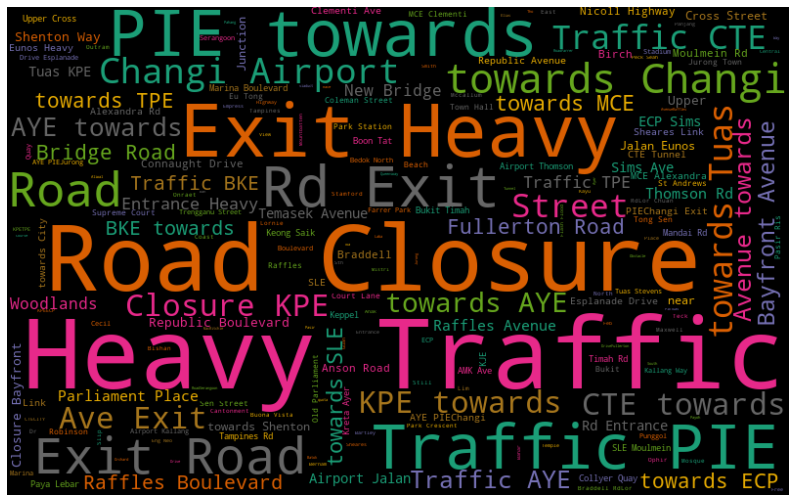

In [144]:
# Most common words in positive tweets

all_words = ' '.join([text for text in df['cleaned_text'][df.sentiment == 'non-serious']])
generate_wordcloud(all_words)

We can see that for Positive Tweets, words like Heavy Traffic, Road Closure indicating the action/results and PIE seems to be the most common location for non-serious (positive) tweets to be surrounding around.

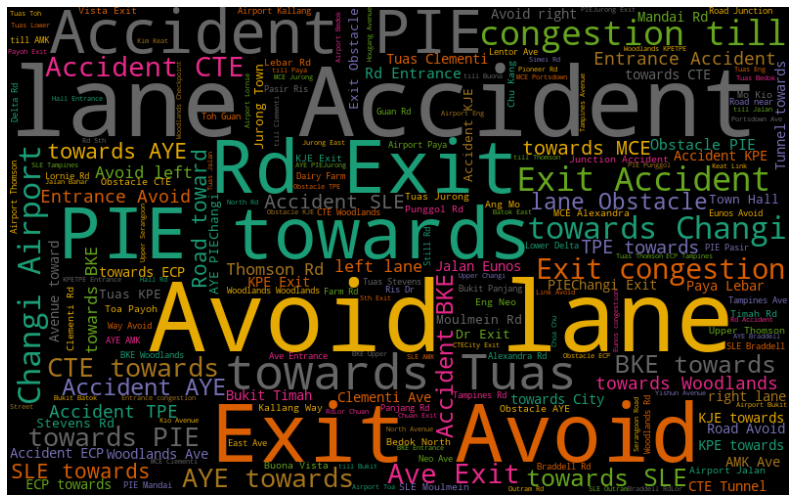

In [145]:
# Most common words in negative tweets

all_words = ' '.join([text for text in df['cleaned_text'][df.sentiment == 'serious']])
generate_wordcloud(all_words)

We can see that for Negative Tweets, words like Accident, Avoid Lane, Obstacle indicating the action/results and PIE and Tuas seems to be the most common location for serious (negative) tweets to be surrounding around.

In [146]:
# function to collect hashtags
import re

def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

In [147]:
hashtags = hashtag_extract(df['text'])
hashtags = sum(hashtags, [])


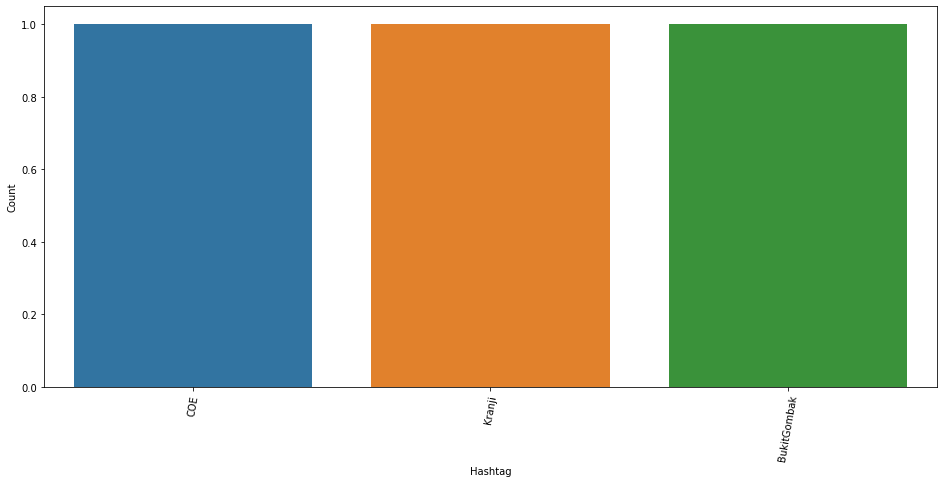

In [148]:
def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()
    
generate_hashtag_freqdist(hashtags)

Minimal usage of hashtags in the LTA Traffic News twitter account (in total of 4)

## Feature Extraction

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1. Bag of words (Simple vectorization)
2. TF-IDF (Term Frequency - Inverse Document Frequency)

In [149]:
# Feature Extraction for 'Key Words

# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')

# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(df['cleaned_text'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')

# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(df['cleaned_text'])

In [150]:
# Feature Extraction for 'Key Phrases'

phrase_sents = df['key_phrases'].apply(lambda x: ' '.join(x))

# BOW phrase features
bow_phrase_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow_phrase_feature = bow_phrase_vectorizer.fit_transform(phrase_sents)

# TF-IDF phrase feature
tfidf_phrase_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2)
tfidf_phrase_feature = tfidf_phrase_vectorizer.fit_transform(phrase_sents)

## Model Building: Sentiment Analysis

In [151]:
target_variable = df['sentiment'].apply(lambda x: 0 if x=='serious' else 1)

In [162]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap='YlGnBu')
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="black" if cm[i, j] < thresh else "white", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True', fontsize=30)
    plt.xlabel('Predicted', fontsize=30)
    
    plt.xlim(-0.5, len(np.unique(target_variable))-0.5)
    plt.ylim(len(np.unique(target_variable))-0.5, -0.5)

    return plt

In [163]:
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score = {accuracy_score(y_test, predictions)}')
    fig = plt.figure(figsize=(7, 7))
    cm = confusion_matrix(y_test, predictions)
    plot = plot_confusion_matrix(cm, classes=['Warning','Non-Warning'], normalize=False, title='Confusion matrix')
    plt.show()
    print(cm)

### Predictions on 'key words' based features

#### BOW word features

Accuracy Score = 0.9689762150982419


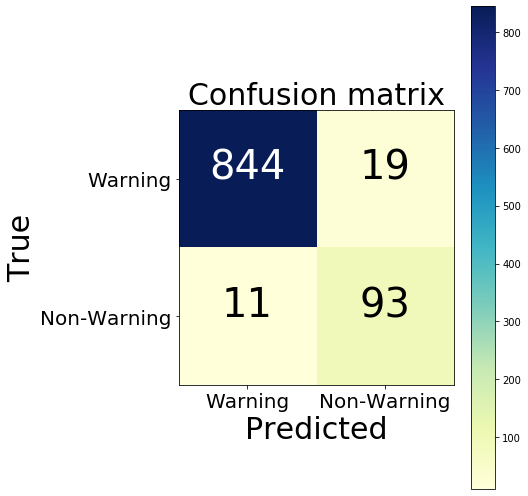

[[844  19]
 [ 11  93]]


In [164]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=42)

naive_model(X_train, X_test, y_train, y_test)

#### TF-IDF word features

Accuracy Score = 0.9710444674250258


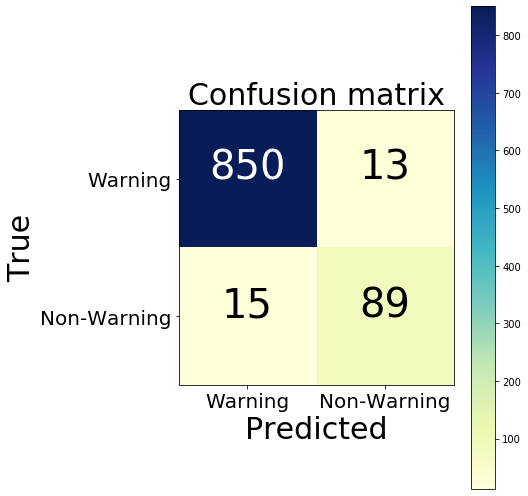

[[850  13]
 [ 15  89]]


In [165]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=42)
naive_model(X_train, X_test, y_train, y_test)

### Predictions on 'key phrases' based features

#### BOW word features

Accuracy Score = 0.3474663908996898


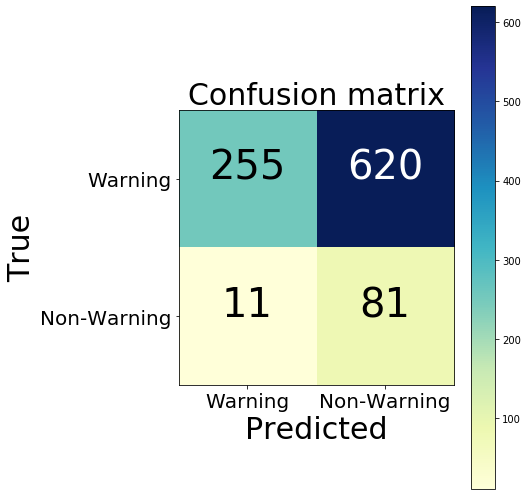

[[255 620]
 [ 11  81]]


In [166]:
X_train, X_test, y_train, y_test = train_test_split(bow_phrase_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

#### TF-IDF word features

Accuracy Score = 0.40020682523267836


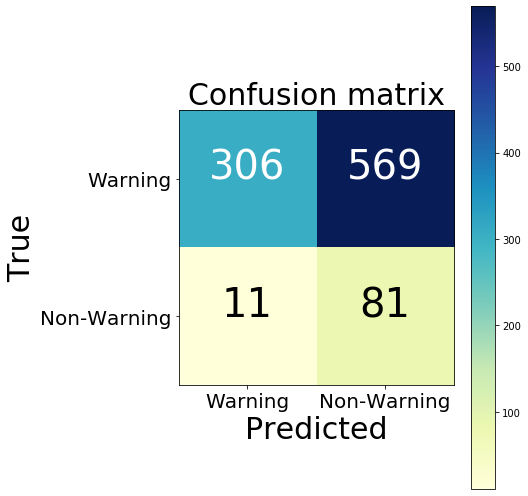

[[306 569]
 [ 11  81]]


In [167]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_phrase_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

Features extracted from 'key words' helps the model in performing better. They have better positive predictions than the latter. However, using 'key-phrase' based features improves the negative predictions.